In [7]:
# inline in the notebook
%matplotlib inline
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
import os
from PIL import Image
import matplotlib.cm as cm

In [107]:
# (a)

imagesn = []
imagesb = []
imagest = []
for f in os.listdir("imgpca") :
    img = Image.open("imgpca/" + f)
    if f[0:1] == "n":
        imagesn.append(img.copy())
    if f[0:1] == "b":
        imagesb.append(img.copy())
    if f[0:1] == "t":
        imagest.append(img.copy())


def sample(category, n, P):
    if category == "n":
        img = imagesb[np.random.randint(0, len(imagesb))]
    if category == "b":
        img = imagesb[np.random.randint(0, len(imagesb))]
    if category == "t":
        img = imagesb[np.random.randint(0, len(imagesb))]
        
    x = np.random.randint(0, img.size[0] - n)
    y = np.random.randint(0, img.size[1] - n)

    subimg = np.asarray(img.crop((x,y,x+n,y+n)).getdata())
    return subimg

def sampleall(n, P):
    imgsn = np.zeros((1, np.power(n,2)))
    imgsb = np.zeros((1, np.power(n,2)))
    imgst = np.zeros((1, np.power(n,2)))
    for i in range(P):
        imgsn = np.vstack( (imgsn, sample("n", n, P).reshape(1,-1)) )
        imgsb = np.vstack( (imgsb, sample("b", n, P).reshape(1,-1)) )
        imgst = np.vstack( (imgst, sample("t", n, P).reshape(1,-1)) )
        if i % 1000 == 0:
            print(i+1000)
    
    return imgsn[1:,:], imgsb[1:,:], imgst[1:,:]


In [118]:
#N_sqrt,P = (20,50000)
N_sqrt,P = (20,20000)   # use this to test
N = N_sqrt**2

imgsn, imgsb, imgst = sampleall(N_sqrt, P)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


(20000, 400)
#==============#
# ICA  Natural #
#==============#


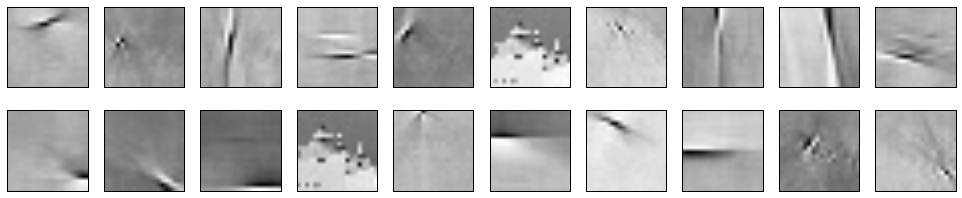

#==============#
# PCA  Natural #
#==============#


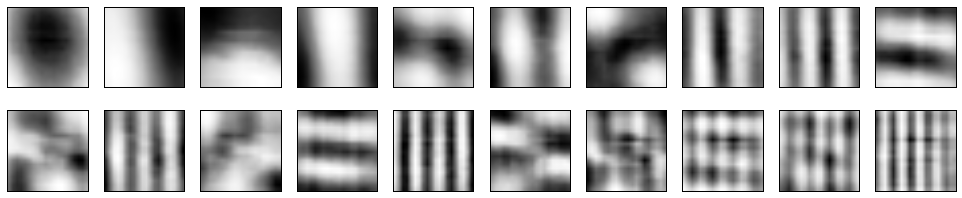

(20000, 400)
#================#
# ICA  Buildings #
#================#


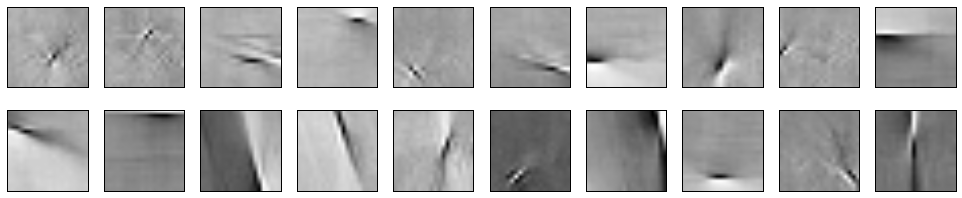

#================#
# PCA  Buildings #
#================#


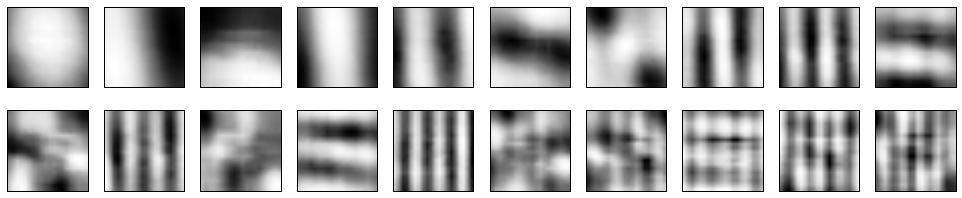

(20000, 400)
#===========#
# ICA  Text #
#===========#


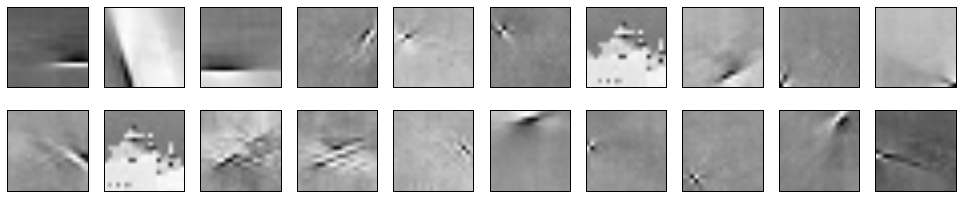

#===========#
# PCA  Text #
#===========#


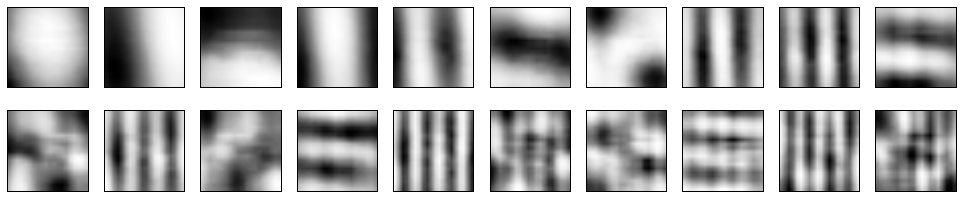

In [120]:
# (c)

numpcrows = 2
numpccols = 10

def plot_comps(A_) : 
    plt.figure(figsize=(17,3.4))
    for i in range(A_.shape[0]) :
        plt.subplot(numpcrows,numpccols,i+1)
        data = A_[i]
        data.shape = (N_sqrt,N_sqrt)
        #print(data)
        plt.imshow(data, cmap = cm.Greys_r)
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    plt.show()
    
    
# (b + d)
category = ["Natural","Buildings","Text"]
for i, imgpatches in enumerate([imgsn, imgsb, imgst]) :
    
    # G(s) = a^{-1} log cosh (as), with a = 1
    # ~> G(s) = log cosh (s)
    # default options use symmetric (called: parallel) and tanh as negentropy approximation (called: log cosh)
    ica = FastICA(max_iter=500) 
    print(imgpatches.shape)
    ica.fit(imgpatches)
    ICA_ = ica.mixing_.T
    print ("#======={0}#".format("="*len(category[i])))
    print ("# ICA  {0} #".format(category[i]))
    print ("#======={0}#".format("="*len(category[i])))
    plot_comps(ICA_[0:numpcrows*numpccols])

    pca = PCA()
    pca.fit(imgpatches)
    PCA_ = pca.components_
    print ("#======={0}#".format("="*len(category[i])))
    print ("# PCA  {0} #".format(category[i]))
    print ("#======={0}#".format("="*len(category[i])))
    plot_comps(PCA_[0:numpcrows*numpccols])
